

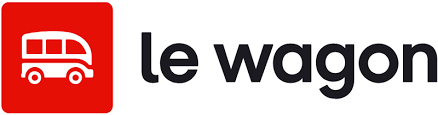



### Comparer les regressions

Comparez le modèle de régression linéaire et le modèle de régression logistique. Pourquoi quelles tâches sont les plus adaptées ? Quels sont leurs avantages et leurs inconvénients ?

L'utilisation de chaque modele dépend du type de données et du problème spécifique à résoudre : continuité pour la régression linéaire et classification binaire pour la régression logistique

La régression linéaire est utilisée pour prédire des variables continues avec une relation supposée linéaire entre les variables. Cependant, elle peut être limitée par sa nécessité de relations linéaires et sa sensibilité aux outliers.. 

La régression logistique  est optimisée pour la classification binaire, fournissant des probabilités de classe. Elle est moins affectée par les valeurs aberrantes.

### Justification de l'accuracy

Vous avez entraîné un modèle pour prédire si un produit aura du succès ou non. Vous obtenez une accuracy de 0.86. Êtes-vous satisfait ? Pourquoi ?

Une accuracy de 0.86 est généralement satisfaisante, mais ce n'est pas un repère, elle ne doit pas être le seul critère d'évaluation.
Par exemple, pour la détection des AVC, il est crucial de se concentrer sur plusieurs métriques d'évaluation afin d'avoir une vue complète de la performance de mon modèle. Dans ce cas, un "Recall" élevée est important car ça minimise les faux négatifs càd les cas d'AVC réels non détectés par le modèle et qu'on pourrait malheureusement laisser sans traitement.

### Différents pré-traitements

Quels sont les différents pré-traitements de données que vous connaissez ? Précisez à quel type de données ils s’appliquent et le code Python si possible.

Pour les données numériques :

*Traitement des outliers*: ça sert à identifier et gérer les valeurs aberrantes qui pourraient fausser l'apprentissage du modèle.

*Standardisation* : mettre à l'échelle la data numérique afin qu'elle ait une distribution plus normale facilitant l'apprentissage des modèles

*Réduction de dimension* : réduire le nombre de variables en conservant le maximum d'informations pertinentes/influantes

Pour les données catégoriques :

*Encodage*: OneHot pour convertir des variables en valeurs binaires pour l'analyse et l'apprentissage et l'nteger encoding pour convertir les catégories en valeurs numériques.

In [ ]:
# detection des outliers num avec la méthode de l'iqr (interquartile range )
import numpy as np
def detect_outliers_iqr(X):
    Q1 = np.percentile(X, 25)
    Q3 = np.percentile(X, 75)
    # Calcul de IQR 
    IQR = Q3 - Q1
    # frontieres min max
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (X < lower_bound) | (X > upper_bound)
    return outliers

# Standardisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# reduction de dimension
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# encodage onehot
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X_cat)

### Ré-équilibrer la donnée

Vous travaillez pour une plateforme de streaming de films. Vous voulez prédire si un film va être beaucoup regardé en fonction de ses caractéristiques.


Votre jeu de données n’est pas balancé - vous avez 10% de vos films qui ont été peu regardés et 90% qui ont été beaucoup regardés.


Que pouvez-vous faire pour rebalancer la donnée ? Plusieurs solutions sont possibles.

Je pourrais par exemple dupliquer aléatoirement des observations de la classe minoritaire jusqu'à atteindre un équilibre avec la classe majoritaire mais cela peut me conduire à un overfitting sur les données dupliquées. Je choisirais donc de créer de nouveaux points synthétiques pour la classe minoritaire en me basnt sur les voisins les plus proches, en utilisant le SMOTE  (Synthetic Minority Over-sampling Technique).

### Efficacité du modèle

Comment savoir si le prétraitement des données a amélioré l’efficacité du modèle ?

Je peux évaluer l'efficacité du prétraitement des données en comparant directement les performances de mon modèle avant et après son application, en utilisant des métriques (recall, f1...). Aussi, l'analyse des courbes d'apprentissage et des types d'erreurs me permettra de déterminer les bénéfices spécifiques du prétraitement.

### Data leakage

Comment éviter de faire du data leakage ? Ajoutez le code Python.

Pour éviter le data leakage faut s'assurer de ne pas appliquer de prétraitement comme la normalisation des données ou l'encodage des catégories avant d'avoir divisé les données en ensembles d'entraînement et de test


In [ ]:
from sklearn.model_selection import train_test_split

# separation en entrainement et   test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Prétraitement uniquement sur X_train et X_test
# ... 

### Etapes d'entraînement d'algorithme

Imaginez que vous devez entraîner un algorithme de régression linéaire.

Quelles sont les différentes étapes nécessaires ?

Utilisez le code Python et n’oubliez pas de préciser la bonne donnée entre donnée d’entraînement et donnée de test.

Les étapes sont: le chargement des données, la préparation des features et de la variable target (cible), la division des données en ensembles d'entraînement et de test, la création et l'entraînement du modèle de régression linéaire, ainsi que l'évaluation des performances du modèle sur l'ensemble de test à l'aide du  MSE et du Rsquared.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
data = pd.read_csv('data.csv')

# Préparation des données
X = data[['Feature1', 'Feature2', 'Feature3']]
 # variable cible
y = data['Target'] 

# Division de la data en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#création du modèle de régression linéaire et entraînement
model = LinearRegression()
model.fit(X_train, y_train)

# prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

#evaluation du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'mean squared error: {mse}'); print(f'r-squared: {r2}')


### Hyper Paramètres

Imaginez que vous devez entraîner un KNNClassifier. Quels sont les différents hyper paramètres que vous pouvez modifier ?

Choisissez-en trois et expliquez quels impacts ils auront.

La valeur de k, la fonction de distance, et la méthode de pondération. 

- Le paramètre k détermine le nombre de voisins à considérer lors de la classification : une valeur plus élevée rend le modèle moins sensible au bruit mais on peut tomber dans l'overfitting. 

- La fonction de distance ( distance euclidienne ou de Manhattan) affecte comment les voisins sont mesurés par rapport à l'échantillon à prédire, influençant la précision du modèle

- La pondération des voisins qui influence également la façon dont les voisins contribuent à la prédiction finale, affectant ainsi la sensibilité aux outliers  et la stabilité globale du modèle.